<a href="https://colab.research.google.com/github/mohak1/machine-learning-labs/blob/main/ml_practical_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###Section 2: Decision Trees

In [ ]:
#training a classifier on breast cancer dataset

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

bc = load_breast_cancer()
X = bc.data
Y = bc.target

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=0)


In [ ]:
from sklearn import tree 
breast_cancer_decision_tree = tree.DecisionTreeClassifier().fit(x_train,y_train)

breast_cancer_decision_tree.score(x_test, y_test)

0.6017783423308987

In [ ]:
#building 10 such decision trees and getting the output

output = []

for i in range(10):
  d_tree = tree.DecisionTreeRegressor().fit(x_train, y_train)
  out = d_tree.score(x_test, y_test)
  print(out)
  output.append(out)
print('average score = ',sum(output)/10)

0.6379803112099078
0.6379803112099078
0.6379803112099078
0.6017783423308987
0.6379803112099078
0.6017783423308987
0.6379803112099078
0.6017783423308987
0.6017783423308987
0.6017783423308987
average score =  0.6198793267704034


In [ ]:
import math
#computing the standard deviation of the result obtained from testing 10 decision trees
#sd**2 = sum(x-mean(x))/total_no_of_x

mean=sum(output)/10
out_minus_mean = output-mean
standard_deviation = math.sqrt(sum(out_minus_mean**2)/10)
print('standard error is the standard deivation:')
print('standard deviation = ', standard_deviation)

standard error is the standard deivation:
standard deviation =  0.018100984439504586


###Section 3: Cross Validation

In [ ]:
#cross validation using sklearn
from sklearn import metrics
from sklearn.model_selection import cross_val_score
#five fold cross validation (cv=5)
cv_scores = cross_val_score(d_tree, X, Y, cv=5)
print('cross validation mean: ', cv_scores.mean())
print('cross validation standard dev: ', cv_scores.std())

cross validation mean:  0.5568330204408595
cross validation standard dev:  0.18376009538747437


In [ ]:
#k fold cross validation without sklearn
'''
process of k fold cross validation:
  1. split the data into k parts
  2. train the classifier on k-1 parts, test on kth part
  3. in next iteration, change the training testing pratition and train
  4. repeat the training process for k iterations
  5. report the mean error and standard deviation
'''

import numpy as np

k = 10
model = tree.DecisionTreeClassifier()
model_score = []
for i in range(k):
  #length of test data: len(data)/k, take the rest of the data for training
  length_of_test_set = math.floor(len(X)/k)
  split_start = length_of_test_set*i
  split_end = (length_of_test_set*i)+length_of_test_set
  test_set_x = X[split_start:split_end,:]
  test_set_y = Y[split_start:split_end]

  #training: 0 to split_start, split_end to len(X or Y)
  a=[]
  a=X[0:split_start,:]
  a=list(a)+list(X[split_end:,:])
  b = Y[0:split_start]
  b=list(b)+list(Y[split_end:])
  training_set_x = np.array(a)
  training_set_y = np.array(b)
  model.fit(training_set_x, training_set_y)
  model_score.append(model.score(test_set_x, test_set_y))

#standard deviation 
mean = sum(model_score)/k
std = math.sqrt(sum((model_score-mean)**2)/k)
print('10 fold cross validation mean: ', mean)
print('10 fold cross validation standard dev: ', std)
print('#######################')
print('score elements: \n', model_score)

10 fold cross validation mean:  0.9214285714285714
10 fold cross validation standard dev:  0.03762733483161692
#######################
score elements: 
 [0.875, 0.9107142857142857, 0.8928571428571429, 1.0, 0.9285714285714286, 0.9642857142857143, 0.9107142857142857, 0.9107142857142857, 0.9464285714285714, 0.875]


In [ ]:
r1 = [[1,2,3],[4,5,6],[7,8,9]]
r2 = [[1,2,3]]
r3 = [a for a in r1 if a not in r2]
print(r3)

[[4, 5, 6], [7, 8, 9]]


###Section 4: Metrics

In [ ]:
#confusion matrix for breast cancer decision tree

#the data: x_train, x_test, y_train, y_test
#the traiend decision tree: breast_cancer_decision_tree

#elements of a confusion matrix: [[TP, FP], [FN, TN]]

#computing the confusion matrix over the validation set (test set here)
TP = 0
FP = 0
FN = 0
TN = 0
for i,data in enumerate(x_test):
  y_hat = breast_cancer_decision_tree.predict(data.reshape(1,-1))
  actual_y = y_test[i]
  if actual_y==1 and y_hat==1:
    TP+=1
  elif actual_y==0 and y_hat==1:
    FP+=1
  elif actual_y==1 and y_hat==0:
    FN+=1
  elif actual_y==0 and y_hat==0:
    TN+=1
  else:
    print(f'case not handled: y_hat={y_hat} and actual_y={actual_y}')

#display the confusion matrix
print('Confusion matrix:\n')
print('                Actual')
print('             | 1   | 0')
print('         ----|-----|------')
print(f'Predicted 1  | {TP}  | {FP}')
print('         ----|-----|------')
print(f'          0  | {FN}   | {TN}')
print('         ----|-----|------')



Confusion matrix:

                Actual
             | 1   | 0
         ----|-----|------
Predicted 1  | 58  | 2
         ----|-----|------
          0  | 9   | 45
         ----|-----|------


In [ ]:
#precision, recall, F1

#precision = TP/(TP+FP)
#recall = TP/(TP+FN)
#f1 = 2*(precision*recall)/(precision+recall)

print(f'Precision: {TP/(TP+FP)}')
print(f'Recall: {TP/(TP+FN)}')
print(f'F1 Score: {2*(TP/(TP+FP))*(TP/(TP+FN))/((TP/(TP+FN))+(TP/(TP+FP)))}')

Precision: 0.9666666666666667
Recall: 0.8656716417910447
F1 Score: 0.9133858267716535


In [ ]:
#mean and standard error of precision and recall of the 10 fold cross-validation decision trees

#a method to compute precision, recall and f1 score

def calculate_prf(tree, test_set_x, test_set_y):
  x_test = test_set_x
  y_test = test_set_y
  TP=0;FP=0; FN=0; TN=0
  for i,data in enumerate(x_test):
    y_hat = tree.predict(data.reshape(1,-1))
    actual_y = y_test[i]
    
    if actual_y==1 and y_hat==1:
      TP+=1
    elif actual_y==0 and y_hat==1:
      FP+=1
    elif actual_y==1 and y_hat==0:
      FN+=1
    elif actual_y==0 and y_hat==0:
      TN+=1
    else:
      print(f'case not handled: y_hat={y_hat} and actual_y={actual_y}')
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1 = 2*(TP/(TP+FP))*(TP/(TP+FN))/((TP/(TP+FN))+(TP/(TP+FP)))
  
  return (precision, recall, f1)

#k fold cross validation for decision trees: 

k = 10
model = tree.DecisionTreeClassifier()
model_score = []
model_precision = []
model_recall = []
model_f1 = []

for i in range(k):
  #length of test data: len(data)/k, take the rest of the data for training
  length_of_test_set = math.floor(len(X)/k)
  split_start = length_of_test_set*i
  split_end = (length_of_test_set*i)+length_of_test_set
  test_set_x = X[split_start:split_end,:]
  test_set_y = Y[split_start:split_end]

  #training: 0 to split_start, split_end to len(X or Y)
  a=[]
  a=X[0:split_start,:]
  a=list(a)+list(X[split_end:,:])
  b = Y[0:split_start]
  b=list(b)+list(Y[split_end:])
  training_set_x = np.array(a)
  training_set_y = np.array(b)
  model.fit(training_set_x, training_set_y)
  model_score.append(model.score(test_set_x, test_set_y))
  
  p,r,f = calculate_prf(model, test_set_x, test_set_y)
  model_precision.append(p)
  model_recall.append(r)
  model_f1.append(f)

#standard deviation 
mean = sum(model_score)/k
std = math.sqrt(sum((model_score-mean)**2)/k)

mean_p = sum(model_precision)
mean_r = sum(model_recall)
mean_f = sum(model_f1)
std_p = math.sqrt(sum((np.array(model_precision)-mean_p)**2)/k)
std_r = math.sqrt(sum((np.array(model_recall)-mean_r)**2)/k)
std_f = math.sqrt(sum((np.array(model_f1)-mean_f)**2)/k)

print('Decision Trees\n')
print('10 fold cross validation mean: ', mean)
print('10 fold cross validation standard dev: ', std)

print('\n10 fold cross validation Precision mean: ', mean_p)
print('10 fold cross validation Precision standard dev: ', std_p)

print('\n10 fold cross validation Recall mean: ', mean_r)
print('10 fold cross validation Recall standard dev: ', std_r)

print('\n10 fold cross validation F1 mean: ', mean_f)
print('10 fold cross validation F1 standard dev: ', std_f)

Decision Trees

10 fold cross validation mean:  0.9232142857142858
10 fold cross validation standard dev:  0.03485575231418417

10 fold cross validation Precision mean:  9.396402188388404
10 fold cross validation Precision standard dev:  8.457103555510379

10 fold cross validation Recall mean:  9.306586047704704
10 fold cross validation Recall standard dev:  8.376047839982617

10 fold cross validation F1 mean:  9.322671291779937
10 fold cross validation F1 standard dev:  8.39050364830652


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


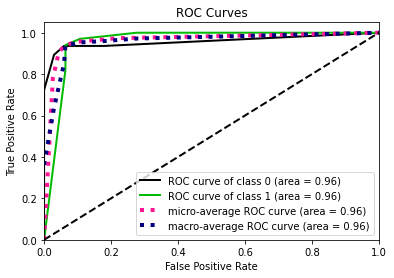

In [ ]:
#ROC curve
!pip install scikit-plot -q

#using knn
from sklearn.neighbors import KNeighborsClassifier
import scikitplot as skplt
import matplotlib.pyplot as plt

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train)
knn_perform = neigh.predict_proba(x_test)
skplt.metrics.plot_roc_curve(y_test, knn_perform)
plt.show()

###Section 5: Nearest Neighbour 

In [ ]:
#10 fold cross validation on knn
from sklearn.neighbors import KNeighborsClassifier

def calculate_prf(tree, test_set_x, test_set_y):
  x_test = test_set_x
  y_test = test_set_y
  TP=0;FP=0; FN=0; TN=0
  for i,data in enumerate(x_test):
    y_hat = tree.predict(data.reshape(1,-1))
    actual_y = y_test[i]
    
    if actual_y==1 and y_hat==1:
      TP+=1
    elif actual_y==0 and y_hat==1:
      FP+=1
    elif actual_y==1 and y_hat==0:
      FN+=1
    elif actual_y==0 and y_hat==0:
      TN+=1
    else:
      print(f'case not handled: y_hat={y_hat} and actual_y={actual_y}')
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1 = 2*(TP/(TP+FP))*(TP/(TP+FN))/((TP/(TP+FN))+(TP/(TP+FP)))
  
  return (precision, recall, f1)

#k fold cross validation for decision trees: 

k = 10
knn_model = KNeighborsClassifier(n_neighbors=10)
model_score = []
model_score = []
model_precision = []
model_recall = []
model_f1 = []

for i in range(k):
  #length of test data: len(data)/k, take the rest of the data for training
  length_of_test_set = math.floor(len(X)/k)
  split_start = length_of_test_set*i
  split_end = (length_of_test_set*i)+length_of_test_set
  test_set_x = X[split_start:split_end,:]
  test_set_y = Y[split_start:split_end]

  #training: 0 to split_start, split_end to len(X or Y)
  a=[]
  a=X[0:split_start,:]
  a=list(a)+list(X[split_end:,:])
  b = Y[0:split_start]
  b=list(b)+list(Y[split_end:])
  training_set_x = np.array(a)
  training_set_y = np.array(b)
  knn_model.fit(training_set_x, training_set_y)
  model_score.append(model.score(test_set_x, test_set_y))
  
  p,r,f = calculate_prf(knn_model, test_set_x, test_set_y)
  model_precision.append(p)
  model_recall.append(r)
  model_f1.append(f)

#standard deviation 
mean = sum(model_score)/k
std = math.sqrt(sum((model_score-mean)**2)/k)

mean_p = sum(model_precision)
mean_r = sum(model_recall)
mean_f = sum(model_f1)
std_p = math.sqrt(sum((np.array(model_precision)-mean_p)**2)/k)
std_r = math.sqrt(sum((np.array(model_recall)-mean_r)**2)/k)
std_f = math.sqrt(sum((np.array(model_f1)-mean_f)**2)/k)

print('K Nearest Neighbour Classifier\n')
print('10 fold cross validation mean: ', mean)
print('10 fold cross validation standard dev: ', std)

print('\n10 fold cross validation Precision mean: ', mean_p)
print('10 fold cross validation Precision standard dev: ', std_p)

print('\n10 fold cross validation Recall mean: ', mean_r)
print('10 fold cross validation Recall standard dev: ', std_r)

print('\n10 fold cross validation F1 mean: ', mean_f)
print('10 fold cross validation F1 standard dev: ', std_f)

K Nearest Neighbour Classifier

10 fold cross validation mean:  0.9205673758865249
10 fold cross validation standard dev:  0.23829787234042554

10 fold cross validation Precision mean:  9.084570535317763
10 fold cross validation Precision standard dev:  8.177425442635228

10 fold cross validation Recall mean:  9.645016301894087
10 fold cross validation Recall standard dev:  8.680578881496183

10 fold cross validation F1 mean:  9.266641624855595
10 fold cross validation F1 standard dev:  8.340521274481828


###Section 6

In [ ]:
#doing on iris dataset
#using sklearn metrics
#knn using 10 neighbours

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

iris = load_iris()

x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)

knn_model_iris = KNeighborsClassifier(n_neighbors=10)

knn_model_iris.fit(x_train, y_train)

knn_result = knn_model_iris.predict(x_test)

acc = accuracy_score(y_test, knn_result)
preci = precision_score(y_test, knn_result, average='micro')
recal = recall_score(y_test, knn_result, average='micro')
f1 = f1_score(y_test, knn_result, average='micro')

print(f'Accuracy={acc}, Precision={preci}, Recall={recal}, F1-Score={f1}')

Accuracy=1.0, Precision=1.0, Recall=1.0, F1-Score=1.0
